In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
import qutip

In [4]:
n_qubits = 1
dev = qml.device("default.qubit", wires=n_qubits) # wiresは使う量子ビットの数

@qml.qnode(dev)
def circuitH():
    qml.Hadamard(wires=0)
    return qml.state()

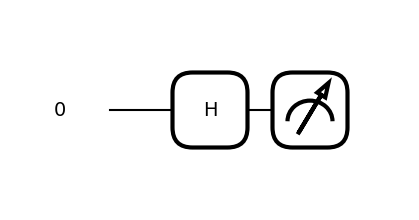

In [5]:
# 回路の描画
fig, ax = qml.draw_mpl(circuitH)()

In [8]:
def bloch_fig(state):
    """
    引数に与えられた状態ベクトルをBloch球上で表示する関数
    """
    qstate = state[0]*qutip.basis(2, 0) + state[1]*qutip.basis(2, 1) # "2"は2次元という意味。
    
    # Bloch球の準備
    b = qutip.Bloch()
    b.make_sphere()
    
    b.add_states(qstate)
    return b

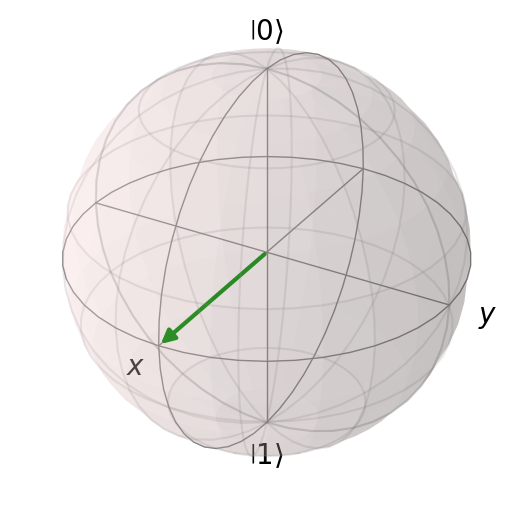

In [9]:
state = circuitH()
bloch_fig(state).show()

---
### 2量子ビット

In [14]:
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits) # wiresは使う量子ビットの数

@qml.qnode(dev)
def circuitCZ():
    qml.CZ([0, 1]) # 左側が制御ビット、右側が対象ビット
    return qml.state()

/tmp/ipykernel_157268/81925049.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


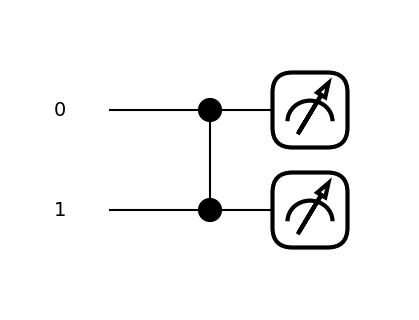

In [16]:
fig, ax = qml.draw_mpl(circuitCZ)()
fig.show()

In [17]:
state = circuitCZ()
state

tensor([1.+0.j, 0.+0.j, 0.+0.j, 0.+0.j], requires_grad=True)

In [18]:
n_qubits = 2
dev = qml.device("default.qubit", wires=n_qubits) # wiresは使う量子ビットの数

@qml.qnode(dev)
def circuitHCZ():
    qml.Hadamard(0)
    qml.Hadamard(1)
    qml.CZ([0, 1]) # 左側が制御ビット、右側が対象ビット
    return qml.state()

/tmp/ipykernel_157268/1082070354.py:2: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


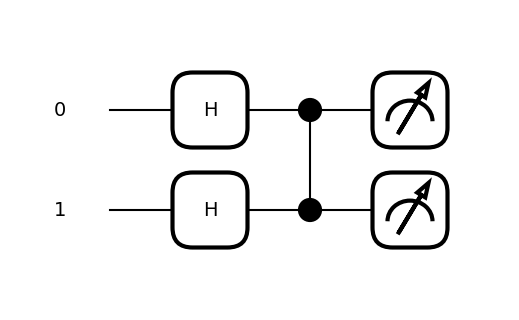

In [19]:
fig, ax = qml.draw_mpl(circuitHCZ)()
fig.show()

In [20]:
state = circuitHCZ()
state

tensor([ 0.5+0.j,  0.5+0.j,  0.5+0.j, -0.5+0.j], requires_grad=True)

In [3]:
#dev = qml.device("lightning.qubit", wires=1) # wiresは使う量子ビットの数
dev = qml.device("default.qubit", wires=1) # wiresは使う量子ビットの数

In [4]:
@qml.qnode(dev)
def circuit(theta):
    qml.RX(theta, wires=0) # 0番目にX回転
    return qml.state()

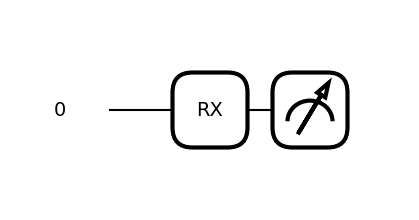

In [28]:
fig, ax = qml.draw_mpl(circuit)(0.1) # 0.1はcircuitの引数の角度

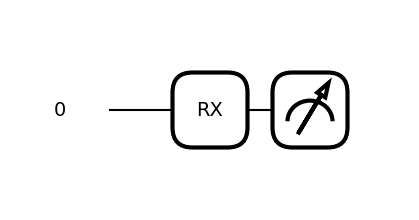

In [27]:
# 別の書き方もできる。
Qnode = qml.QNode(circuit, dev) # circuitをdevにつける。
fig, ax = qml.draw_mpl(Qnode)(0.1)

### 描画スタイルの変更

In [11]:
qml.drawer.available_styles()

('black_white',
 'black_white_dark',
 'sketch',
 'pennylane',
 'pennylane_sketch',
 'sketch_dark',
 'solarized_light',
 'solarized_dark',
 'default')

In [26]:
qml.drawer.use_style("black_white")

In [31]:
state = circuit(0.1)
print(state)

[0.99875026+0.j         0.        -0.04997917j]


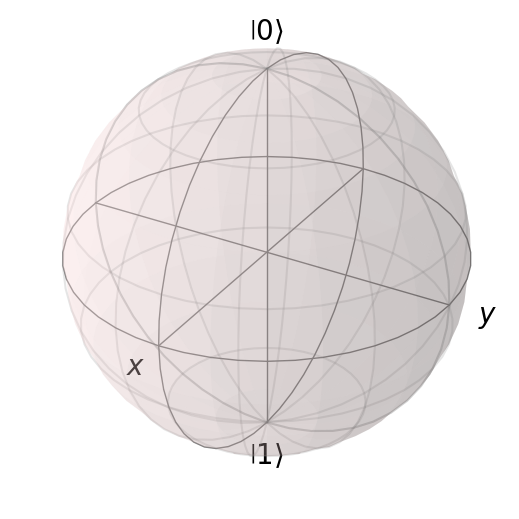

In [33]:
# Bloch球を用意する。
b = qutip.Bloch()
b.make_sphere()

# Bloch球の表示。
b.show()

In [34]:
qstate = state[0]*qutip.basis(2, 0) + state[1]*qutip.basis(2, 1)

In [35]:
qstate

Quantum object: dims=[[2], [1]], shape=(2, 1), type='ket', dtype=Dense
Qobj data =
[[0.99875026+0.j        ]
 [0.        -0.04997917j]]

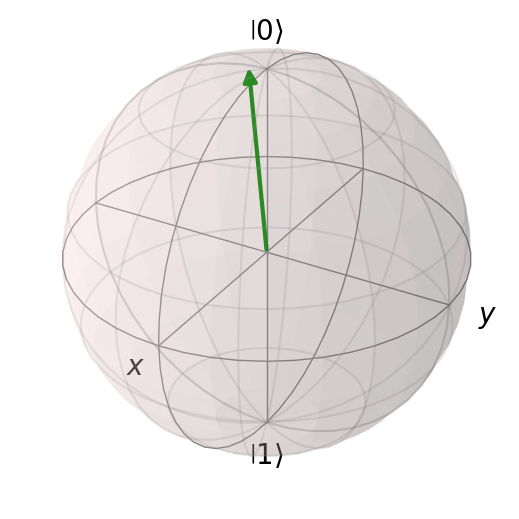

In [37]:
b = qutip.Bloch()
b.make_sphere()
b.add_states(qstate)
b.show()

In [38]:
def bloch_fig(state):
    qstate = state[0]*qutip.basis(2, 0) + state[1]*qutip.basis(2, 1) # "2"は2次元という意味。
    b = qutip.Bloch()
    b.make_sphere()
    b.add_states(qstate)
    return b

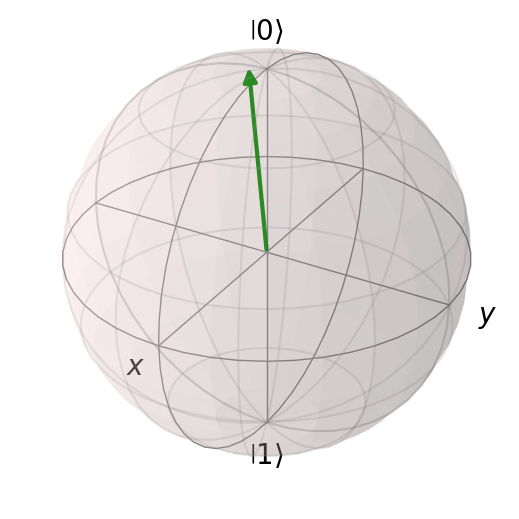

In [39]:
bloch_fig(state).show()

In [40]:
@qml.qnode(dev)
def circuit_prob(theta):
    """
    量子状態の確率を調べる。
    """
    qml.RX(theta, wires=0)
    return qml.probs(wires=0)

In [41]:
print(circuit_prob(np.pi)) # 左は0が出る確率、右は1が出る確率

[3.74939946e-33 1.00000000e+00]


In [42]:
print(circuit_prob(np.pi/2)) 

[0.5 0.5]


In [43]:
from qiskit_ibm_provider import IBMProvider

/tmp/ipykernel_9385/1305876351.py:1: DeprecationWarning: The package qiskit_ibm_provider is being deprecated. Please see https://docs.quantum.ibm.com/api/migration-guides/qiskit-runtime to get instructions on how to migrate to qiskit-ibm-runtime (https://github.com/Qiskit/qiskit-ibm-runtime).
  from qiskit_ibm_provider import IBMProvider


In [44]:
from qiskit_ibm_runtime import QiskitRuntimeService